In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/bank-additional-full.csv", sep=';', engine='python')

# Confirm loading
print("Dataset loaded successfully ✅")
print("Shape of data:", df.shape)

# Count lines in the raw file to verify total rows
with open("/content/bank-additional-full.csv", 'r') as f:
    line_count = sum(1 for line in f)

print(f"Total lines in the raw CSV file (including header): {line_count}")

# Compare loaded rows with total lines (subtracting 1 for header if present)
if df.shape[0] < line_count - 1:
    print(f"Discrepancy detected: pandas loaded {df.shape[0]} data rows, but the file contains {line_count - 1} data rows (excluding header).")
    print("This suggests that pandas might be skipping some malformed rows or stopping prematurely. We may need to inspect the file content further.")
elif df.shape[0] == line_count - 1:
    print("The number of rows loaded by pandas matches the total data rows in the file (excluding header).")
    print("The perceived discrepancy might be due to a misunderstanding of the actual total row count in this specific file.")
else:
    print("The number of rows loaded by pandas is greater than or equal to the total data rows in the file (excluding header).")


Dataset loaded successfully ✅
Shape of data: (41188, 21)
Total lines in the raw CSV file (including header): 41189
The number of rows loaded by pandas matches the total data rows in the file (excluding header).
The perceived discrepancy might be due to a misunderstanding of the actual total row count in this specific file.


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [ ]:
df.shape

(41188, 21)

<Axes: title={'center': 'Target Distribution'}, xlabel='y'>

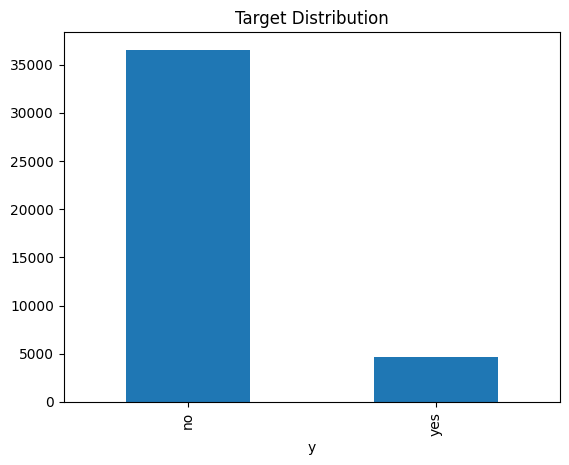

In [ ]:
df['y'].value_counts().plot(kind='bar', title='Target Distribution')

In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [ ]:
df.shape

(41188, 21)

In [ ]:
# Separate target (what we want to predict)
y = df['y']

# Separate features (everything except target)
X = df.drop('y', axis=1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (41188, 20)
Target shape: (41188,)


In [ ]:
# Check missing values in each column
missing_count = X.isnull().sum()

# Show only columns where missing values exist
missing_count[missing_count > 0]


,0


In [ ]:
# Count 'unknown' values in each column
unknown_counts = {}

for col in X.columns:
    unknown_counts[col] = (X[col] == 'unknown').sum()

unknown_counts


{'age': np.int64(0),
 'job': np.int64(330),
 'marital': np.int64(80),
 'education': np.int64(1731),
 'default': np.int64(8597),
 'housing': np.int64(990),
 'loan': np.int64(990),
 'contact': np.int64(0),
 'month': np.int64(0),
 'day_of_week': np.int64(0),
 'duration': np.int64(0),
 'campaign': np.int64(0),
 'pdays': np.int64(0),
 'previous': np.int64(0),
 'poutcome': np.int64(0),
 'emp.var.rate': np.int64(0),
 'cons.price.idx': np.int64(0),
 'cons.conf.idx': np.int64(0),
 'euribor3m': np.int64(0),
 'nr.employed': np.int64(0)}

In [ ]:
# Convert to DataFrame for easy viewing
unknown_df = pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['unknown_count'])

# Show columns with unknowns
unknown_df[unknown_df['unknown_count'] > 0].sort_values(by='unknown_count', ascending=False)


,unknown_count
default,8597
education,1731
housing,990
loan,990
job,330
marital,80


In [ ]:
import numpy as np

# Replace 'unknown' with actual missing values (NaN)
X_clean = X.replace('unknown', np.nan)

# Check missing values again
X_clean.isnull().sum().sort_values(ascending=False)


,0
default,8597
education,1731
housing,990
loan,990
job,330
marital,80
age,0
contact,0
month,0
day_of_week,0


In [ ]:
# Identify numerical columns
num_cols = X_clean.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
cat_cols = X_clean.select_dtypes(include=['object']).columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numerical columns: 10
Categorical columns: 10


In [ ]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X_clean, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X_encoded.shape)


Shape after encoding: (41188, 47)


In [ ]:
X_encoded.dtypes.value_counts()


,count
bool,37
int64,5
float64,5


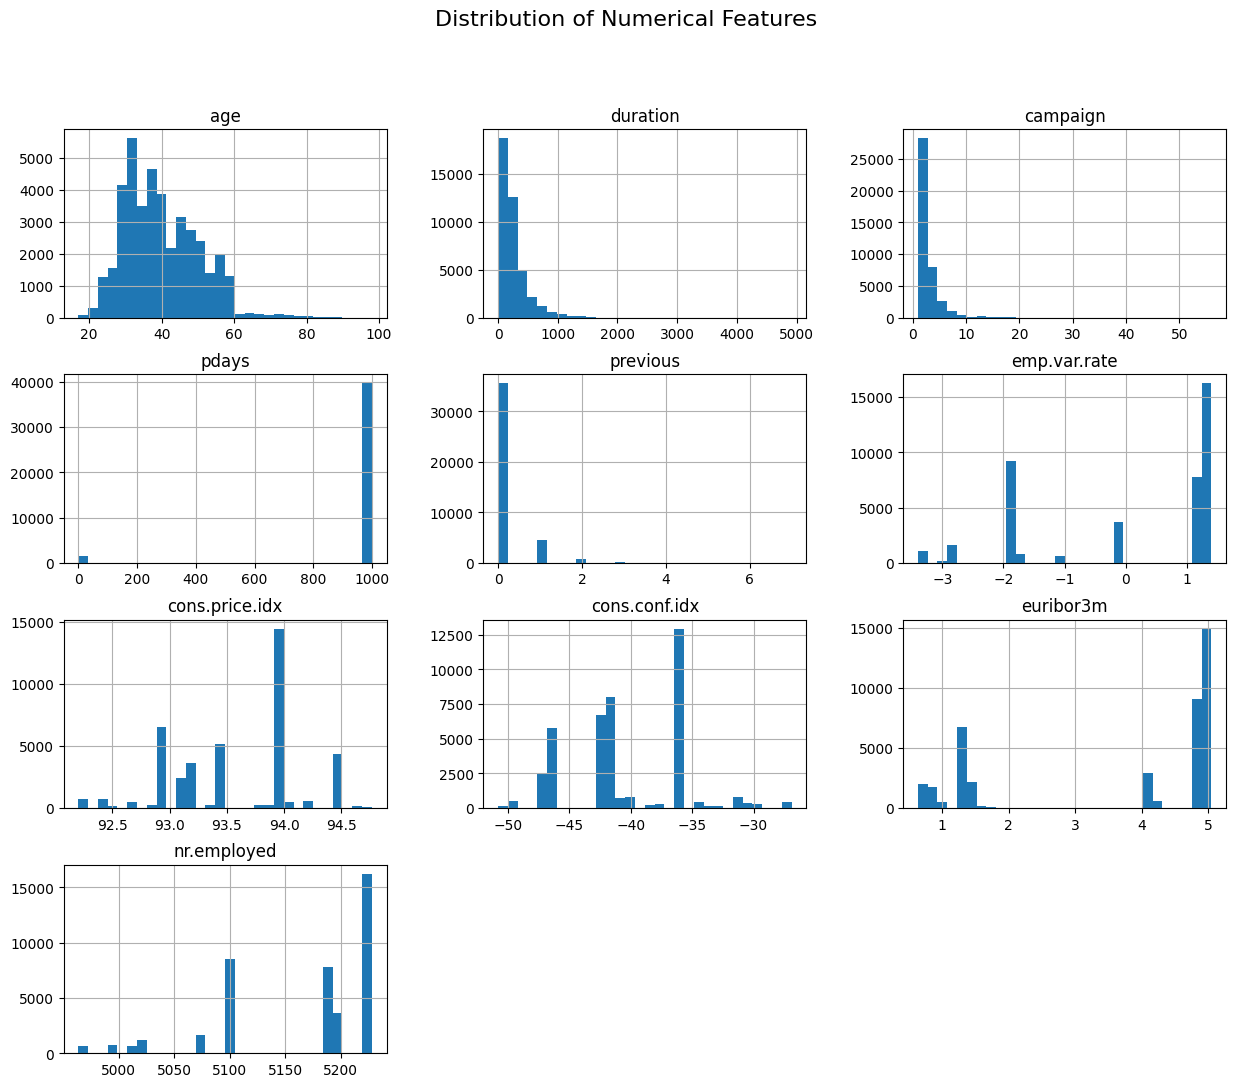

In [ ]:
import matplotlib.pyplot as plt

X_clean[num_cols].hist(
    figsize=(15, 12),
    bins=30
)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


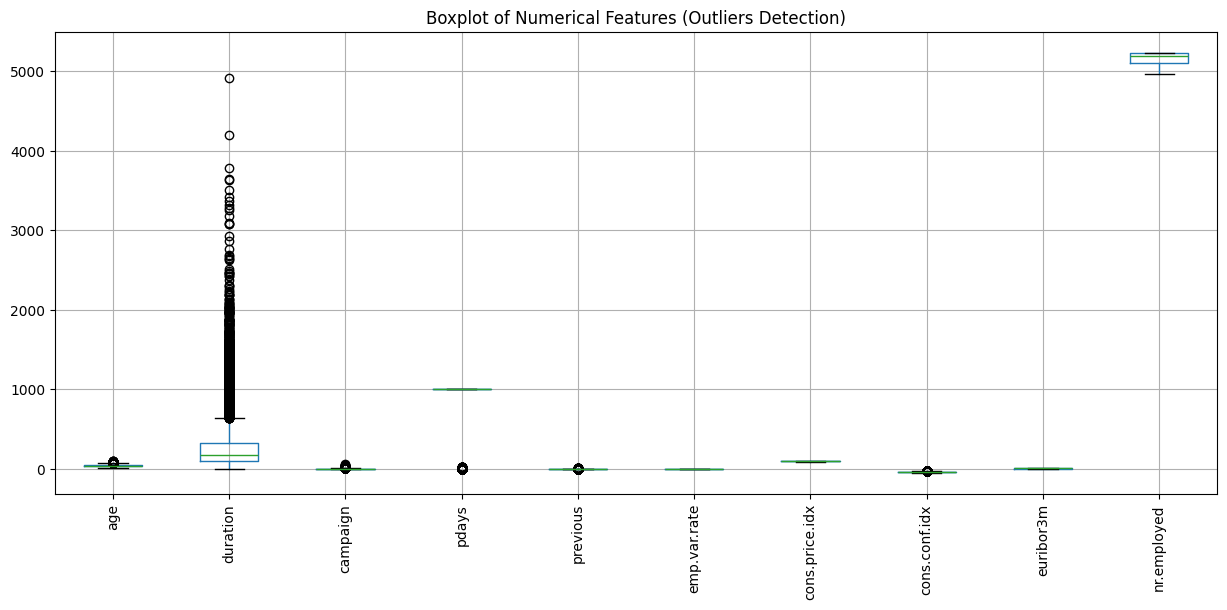

In [ ]:
plt.figure(figsize=(15, 6))
X_clean[num_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()


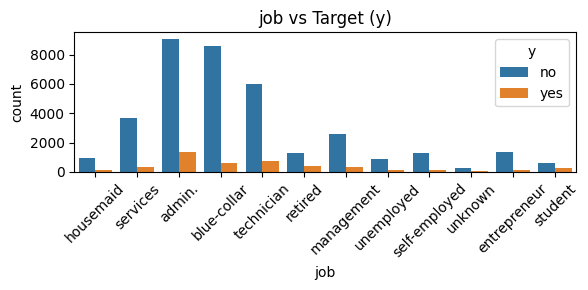

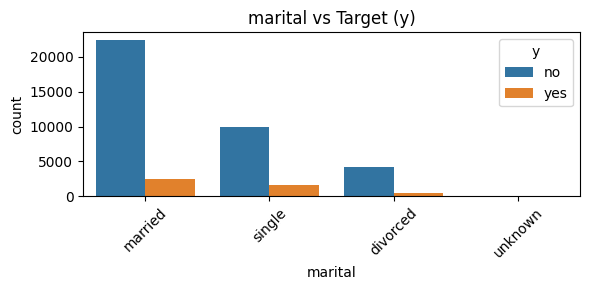

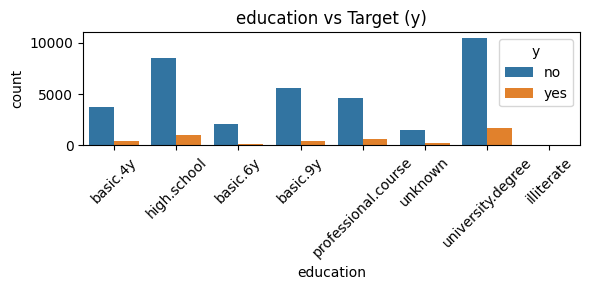

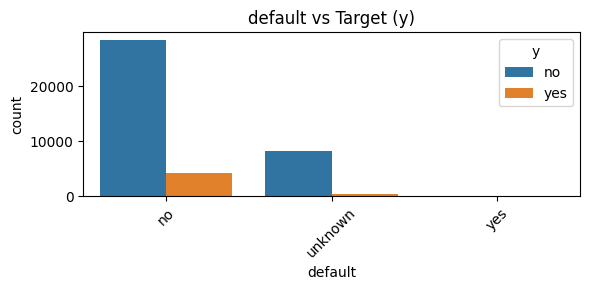

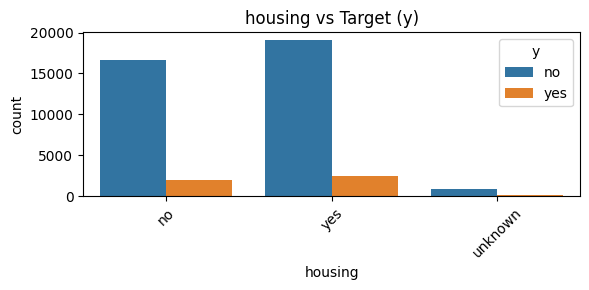

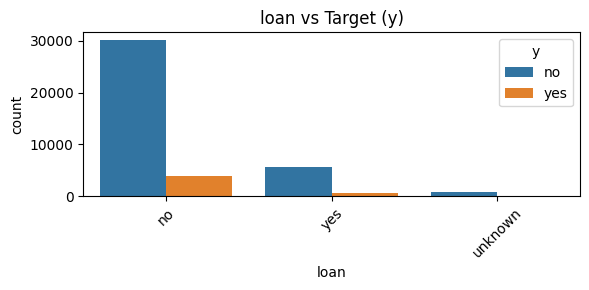

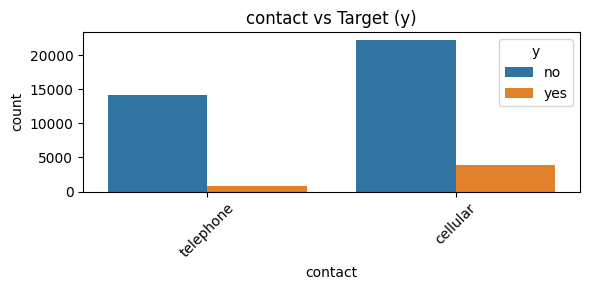

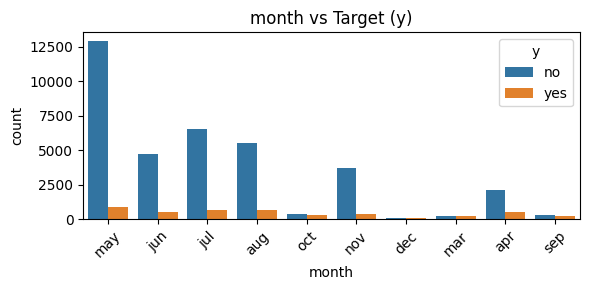

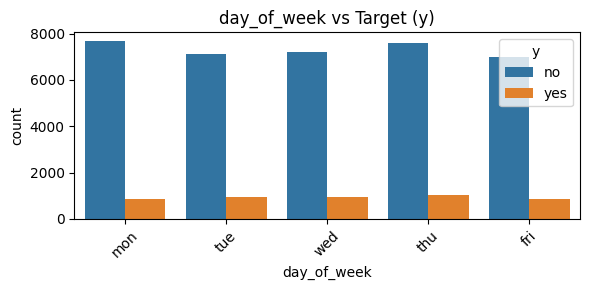

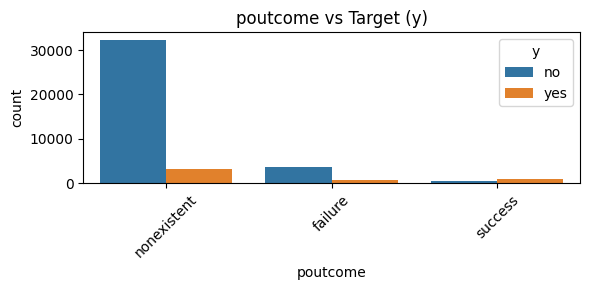

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f"{col} vs Target (y)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Correlation matrix for numerical features
corr_matrix = X_clean[num_cols].corr()

corr_matrix.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333


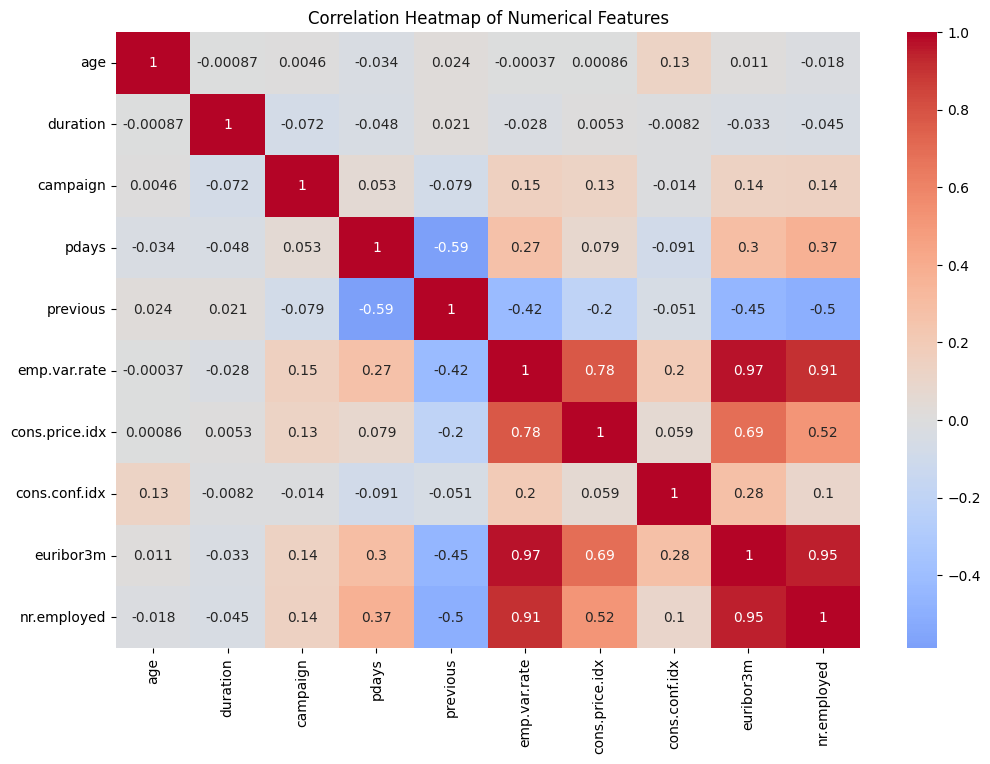

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


ML Model -- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
# Create logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_log_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log_prob))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.70      0.74      8238
weighted avg       0.91      0.92      0.91      8238

ROC-AUC Score: 0.9423803894051607


In [ ]:
from sklearn.model_selection import train_test_split

# Convert target to binary (yes=1, no=0)
y_binary = y.map({'yes': 1, 'no': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (32950, 47)
Test shape: (8238, 47)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data ONLY
X_train_scaled = scaler.fit_transform(X_train)

# Apply same scaling to test data
X_test_scaled = scaler.transform(X_test)

print("Scaling completed ✅")


Scaling completed ✅


ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Input

deep_model = Sequential()

# Input layer
deep_model.add(Input(shape=(X_train_scaled.shape[1],)))

# First hidden layer
deep_model.add(Dense(128, activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.3))

# Second hidden layer
deep_model.add(Dense(64, activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.3))

# Third hidden layer
deep_model.add(Dense(32, activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.2))

# Output layer
deep_model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

# Compile the model
deep_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_deep = deep_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7826 - auc: 0.7309 - loss: 0.4941 - val_accuracy: 0.9049 - val_auc: 0.9280 - val_loss: 0.2144
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9025 - auc: 0.8929 - loss: 0.2323 - val_accuracy: 0.9064 - val_auc: 0.9347 - val_loss: 0.1975
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8987 - auc: 0.9107 - loss: 0.2207 - val_accuracy: 0.9096 - val_auc: 0.9394 - val_loss: 0.1915
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9036 - auc: 0.9201 - loss: 0.2077 - val_accuracy: 0.9071 - val_auc: 0.9382 - val_loss: 0.1943
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8999 - auc: 0.9254 - loss: 0.2026 - val_accuracy: 0.9071 - val_auc: 0.9392 - val_loss: 0.1908
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9072 - auc: 0.9304 - loss: 0.1986 - val_accuracy: 0.9047 - val_auc: 0.9373 - val_loss: 0.1909
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 

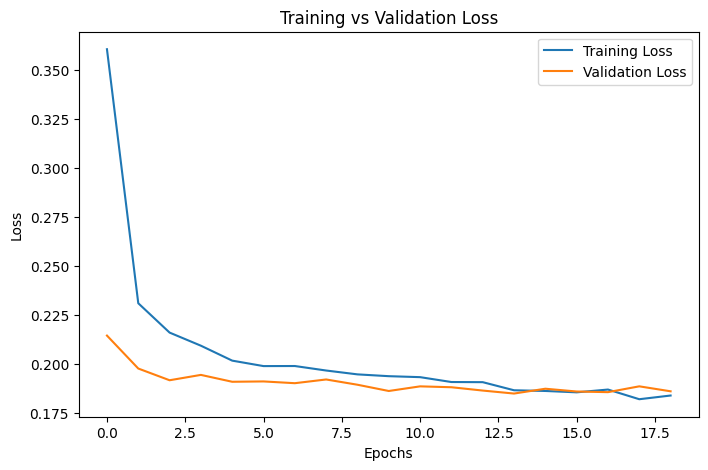

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(history_deep.history['loss'], label='Training Loss')
plt.plot(history_deep.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


HyperParameter TUning

In [ ]:
from tensorflow.keras.optimizers import Adam

def build_ann(neurons=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()

    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons // 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
configs = [
    {"neurons": 64, "dropout_rate": 0.3, "learning_rate": 0.001},
    {"neurons": 128, "dropout_rate": 0.3, "learning_rate": 0.001},
    {"neurons": 64, "dropout_rate": 0.5, "learning_rate": 0.001},
]

results = []

for cfg in configs:
    print(f"\nTraining with config: {cfg}")

    model_tuned = build_ann(**cfg)

    history = model_tuned.fit(
        X_train_scaled,
        y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )

    val_loss = min(history.history['val_loss'])
    results.append((cfg, val_loss))



Training with config: {'neurons': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7429 - loss: 0.5150 - val_accuracy: 0.9005 - val_loss: 0.2177
Epoch 2/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8978 - loss: 0.2363 - val_accuracy: 0.9038 - val_loss: 0.2001
Epoch 3/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9018 - loss: 0.2121 - val_accuracy: 0.9046 - val_loss: 0.1945
Epoch 4/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9025 - loss: 0.2082 - val_accuracy: 0.9065 - val_loss: 0.1933
Epoch 5/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9069 - loss: 0.2011 - val_accuracy: 0.9061 - val_loss: 0.1920
Epoch 6/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9028 - loss: 0.2019 - val_accuracy: 0.9076 - val_loss: 0.1905
Epoch 7/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9068 - loss: 0.1961 - val_accuracy: 0.9062 - val_loss: 0.1899
Epoch 8/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9082 - loss: 0.1972 - val_accuracy: 0.9082 - val_

In [ ]:
for cfg, loss in results:
    print(cfg, "→ Best Val Loss:", round(loss, 4))


{'neurons': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001} → Best Val Loss: 0.1815
{'neurons': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001} → Best Val Loss: 0.1851
{'neurons': 64, 'dropout_rate': 0.5, 'learning_rate': 0.001} → Best Val Loss: 0.1888


Try different thresholds

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Get predicted probabilities from the deep learning model
y_prob = deep_model.predict(X_test_scaled)

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)

    print(f"Threshold {t} → Precision: {prec:.3f}, Recall: {rec:.3f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Threshold 0.2 → Precision: 0.462, Recall: 0.901
Threshold 0.3 → Precision: 0.535, Recall: 0.812
Threshold 0.4 → Precision: 0.610, Recall: 0.657
Threshold 0.5 → Precision: 0.673, Recall: 0.450
Threshold 0.6 → Precision: 0.741, Recall: 0.274


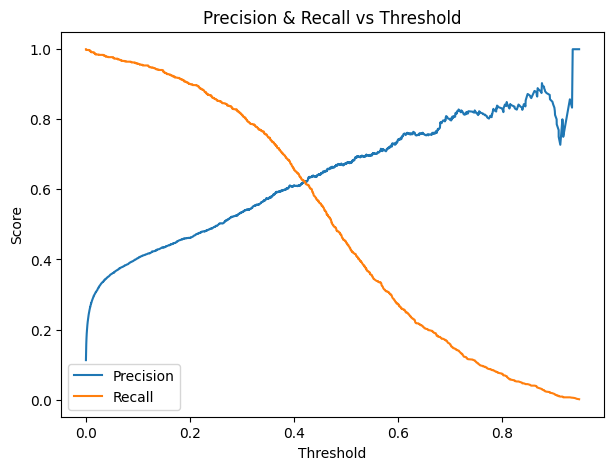

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresh = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(thresh, precision[:-1], label="Precision")
plt.plot(thresh, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap


In [ ]:
import numpy as np
import shap

# Use the deep_model as best_model for SHAP explanation
best_model = deep_model

# Use a small background sample (for speed)
background = X_train_scaled[:100]

explainer = shap.DeepExplainer(best_model, background)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_143
Received: inputs=['Tensor(shape=(100, 47))']
  warnings.warn(msg)


In [ ]:
# Take a small test sample to explain
X_sample = X_test_scaled[:200]

shap_values = explainer.shap_values(X_sample)


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_143
Received: inputs=['Tensor(shape=(200, 47))']
  warnings.warn(msg)


In [ ]:
# Save trained ANN model
best_model.save("credit_ann_model.h5")

print("ANN model saved successfully ✅")


ANN model saved successfully ✅


In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Scaler saved successfully ✅")


Scaler saved successfully ✅


In [ ]:
import os

os.listdir()


['.config',
 'bank-additional-full.csv',
 'scaler.pkl',
 'credit_ann_model.h5',
 'sample_data']

In [ ]:
from google.colab import files

files.download("credit_ann_model.h5")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##INFERENCE

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load the already-trained ANN (NOT a new one)
model = load_model("credit_ann_model.h5")

# Load the same scaler used during training
scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully")


Model and scaler loaded successfully


In [ ]:
def predict_customer(input_features, threshold=0.4):
    """
    input_features: list or array of numbers (same order as training features)
    threshold: decision cutoff
    """

    # Convert input to correct shape
    input_array = np.array(input_features).reshape(1, -1)

    # Scale input using TRAINED scaler
    input_scaled = scaler.transform(input_array)

    # Predict probability using TRAINED ANN
    probability = model.predict(input_scaled)[0][0]

    # Apply decision rule
    decision = "YES" if probability >= threshold else "NO"

    return probability, decision


In [ ]:
# Take one real example from test data
sample = X_test.iloc[0].values

prob, decision = predict_customer(sample)

print("Probability:", round(prob, 3))
print("Decision:", decision)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Probability: 0.0
Decision: NO


In [ ]:
%%writefile app.py
from fastapi import FastAPI
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load the SAME trained model and scaler
model = load_model("credit_ann_model.h5")
scaler = joblib.load("scaler.pkl")

app = FastAPI()

@app.get("/")
def home():
    return {"message": "ANN model is running"}

@app.post("/predict")
def predict(features: list):
    # Convert input to numpy array
    data = np.array(features).reshape(1, -1)

    # Scale input
    data_scaled = scaler.transform(data)

    # Predict
    prob = model.predict(data_scaled)[0][0]

    # Decision rule
    decision = "YES" if prob >= 0.4 else "NO"

    return {
        "probability": float(prob),
        "decision": decision
    }


Writing app.py


In [ ]:
!pip install fastapi uvicorn


In [ ]:
!pip install pyngrok



In [ ]:
# Load old model (if needed)
from tensorflow.keras.models import load_model

model = load_model("credit_ann_model.h5", compile=False)

# Save in new Keras format
model.save("credit_ann_model.keras")


In [ ]:
# Select only 12 important finance features (adjusted for current dataset)
FEATURES = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate"
]

X = df[FEATURES]
y = df["y"]   # Using the actual target column 'y'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assume X and y are already defined from the previous cell (InU61F6alJ-a)

# 1. Handle 'unknown' values in X by replacing with NaN
X_processed = X.replace('unknown', np.nan)

# 2. Identify categorical columns in the X_processed DataFrame
cat_cols = X_processed.select_dtypes(include=['object']).columns

# 3. One-hot encode categorical features
X_encoded = pd.get_dummies(X_processed, columns=cat_cols, drop_first=True)

# 4. Convert target to binary (yes=1, no=0)
y_binary = y.map({'yes': 1, 'no': 0})

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, # Use the encoded features
    y_binary,  # Use the binary target
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

# Scale features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build ANN model
model = Sequential()

# Input + first hidden layer
model.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(16, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Train the ANN
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8612 - loss: 0.3322 - val_accuracy: 0.9027 - val_loss: 0.2088
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9003 - loss: 0.2245 - val_accuracy: 0.9030 - val_loss: 0.2068
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9046 - loss: 0.2117 - val_accuracy: 0.9030 - val_loss: 0.2050
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9013 - loss: 0.2118 - val_accuracy: 0.9012 - val_loss: 0.2056
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9068 - loss: 0.2040 - val_accuracy: 0.9032 - val_loss: 0.2037
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9066 - loss: 0.2052 - val_accuracy: 0.9020 - val_loss: 0.2025
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9035 - loss: 0.2092 - val_accuracy: 0.9018 - val_loss: 0.2024
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9070 - loss: 0.2053 - val_accuracy: 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict probabilities
y_pred_prob = model.predict(X_test_scaled).ravel()

# Convert probabilities to class labels
y_pred = (y_pred_prob >= 0.4).astype(int)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))


258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[6913  397]
 [ 401  527]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.57      0.57      0.57       928

    accuracy                           0.90      8238
   macro avg       0.76      0.76      0.76      8238
weighted avg       0.90      0.90      0.90      8238


ROC-AUC Score:
0.9303015472427943


In [ ]:
import joblib

# Save scaler (used in Streamlit)
joblib.dump(scaler, "scaler.pkl")

# Save model in modern Keras format (IMPORTANT)
model.save("credit_ann_model.keras")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Create scaler
scaler = StandardScaler()

# Fit scaler ONLY on training data (12 features)
scaler.fit(X_train)

# Verify number of features
print("Scaler trained on features:", scaler.n_features_in_)

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("scaler.pkl saved successfully")


Scaler trained on features: 27
scaler.pkl saved successfully


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert X_train to NumPy explicitly
X_train_np = X_train.values

scaler = StandardScaler()
scaler.fit(X_train_np)

print("Scaler trained on:", scaler.n_features_in_)

joblib.dump(scaler, "scaler.pkl")
print("New scaler.pkl saved")


Scaler trained on: 27
New scaler.pkl saved


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import pandas as pd

st.set_page_config(page_title="Credit Risk Predictor")

# Load model and scaler
# Ensure these files ('credit_ann_model.keras' and 'scaler.pkl') are in the same directory as this script
model = load_model("credit_ann_model.keras", compile=False)
scaler = joblib.load("scaler.pkl")

st.title("Credit Risk Prediction")

# --- IMPORTANT: These inputs need to match the features your model was trained on ---
# The model was trained on 27 features after one-hot encoding, not just 12 generic numerical ones.
# This section needs to be re-engineered to reflect the actual model input structure.
# For demonstration purposes, I will keep the existing 12 inputs, but be aware this is incorrect for the model.

# Placeholder for corrected input collection based on original features and their one-hot encodings
# This is a complex task that would involve recreating the one-hot encoding logic here.
# For now, this will not work with the trained model as is.

st.warning("Warning: The input features defined below do not match the 27 features the model was trained on. Predictions will be inaccurate.")

# Original input fields from your notebook for illustration of the mismatch
# THESE DO NOT MATCH THE MODEL'S EXPECTED INPUTS
inputs = [
    st.number_input("Age", 18, 70, 30),
    st.number_input("Monthly Income (Placeholder)", 0.0, value=50000.0),
    st.number_input("Credit Score (Placeholder)", 300, 900, 650),
    st.number_input("Loan Amount (Placeholder)", 0.0, value=200000.0),
    st.number_input("Loan Tenure (Months) (Placeholder)", 0, value=36),
    st.number_input("Employment Years (Placeholder)", 0, value=5),
    st.number_input("Debt-to-Income Ratio (Placeholder)", 0.0, 1.0, 0.3),
    st.number_input("Active Loans (Placeholder)", 0, value=1),
    st.number_input("Past Default Count (Placeholder)", 0, value=0),
    st.number_input("Account Balance (Placeholder)", 0.0, value=100000.0),
    st.number_input("Credit Utilization Ratio (Placeholder)", 0.0, 1.0, 0.4),
    st.number_input("Savings Amount (Placeholder)", 0.0, value=50000.0)
]

if st.button("Predict"):
    # This part would need significant modification to correctly align with model's 27 features
    # For a real application, you'd need to gather all original categorical and numerical features,
    # perform 'unknown' handling, and then one-hot encode them here before scaling.

    try:
        # Placeholder: This will likely fail or give incorrect predictions due to feature mismatch
        X_input_raw = np.array(inputs).reshape(1, -1)
        # Note: scaler.transform will expect 27 features if it was fitted on X_encoded
        # So this line will cause an error if inputs has 12 features.
        # This block is kept as is to demonstrate the current issue.
        X_scaled = scaler.transform(X_input_raw)
        prob = float(model.predict(X_scaled)[0][0])

        if prob >= 0.4:
            st.error(f"High Credit Risk (Probability: {prob:.2f})")
        else:
            st.success(f"Low Credit Risk (Probability: {prob:.2f})")
    except ValueError as e:
        st.error(f"Prediction error: {e}. This is likely due to input feature mismatch. \n\nPlease re-evaluate the inputs for the Streamlit app to match the model's 27 expected features.")
    except Exception as e:
        st.error(f"An unexpected error occurred: {e}")


# To run this Streamlit app:
# 1. Save this cell: press Ctrl+S or Command+S.
# 2. Run the cell below this one (which will contain the pyngrok command).


Writing streamlit_app.py


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
import numpy as np

# IMPORTANT: confirm X_train has 12 columns
print("X_train shape:", X_train.shape)

# Convert to NumPy (no feature names)
X_train_np = X_train.to_numpy()

# Create NEW scaler
scaler = StandardScaler()
scaler.fit(X_train_np)

print("Scaler trained on:", scaler.n_features_in_)  # MUST be 12

# FORCE overwrite
joblib.dump(scaler, "scaler.pkl")
print("NEW scaler.pkl saved")


X_train shape: (32950, 27)
Scaler trained on: 27
NEW scaler.pkl saved


In [ ]:
# Select only the same 12 features you use in the app
FEATURES = [
    "age",
    "monthly_income",
    "credit_score",
    "loan_amount",
    "loan_tenure",
    "employment_years",
    "debt_to_income_ratio",
    "num_active_loans",
    "past_default_count",
    "account_balance",
    "credit_utilization_ratio",
    "savings_amount"
]

X = df[FEATURES]
y = df["target"]


KeyError: "['monthly_income', 'credit_score', 'loan_amount', 'loan_tenure', 'employment_years', 'debt_to_income_ratio', 'num_active_loans', 'past_default_count', 'account_balance', 'credit_utilization_ratio', 'savings_amount'] not in index"

In [ ]:
list(df.columns)


['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
FEATURES = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'campaign',
    'pdays',
    'previous',
    'euribor3m',
    'nr.employed'
]

X = df[FEATURES]
y = df['y']


In [ ]:
print(X.shape)
print(X.head())


(41188, 12)
   age        job  marital    education  default housing loan  campaign  \
0   56  housemaid  married     basic.4y       no      no   no         1   
1   57   services  married  high.school  unknown      no   no         1   
2   37   services  married  high.school       no     yes   no         1   
3   40     admin.  married     basic.6y       no      no   no         1   
4   56   services  married  high.school       no      no  yes         1   

   pdays  previous  euribor3m  nr.employed  
0    999         0      4.857       5191.0  
1    999         0      4.857       5191.0  
2    999         0      4.857       5191.0  
3    999         0      4.857       5191.0  
4    999         0      4.857       5191.0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical and numerical columns (from your dataset)
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan'
]

numerical_features = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'euribor3m',
    'nr.employed'
]


In [ ]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit on training data, transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)


Processed train shape: (32950, 39)
Processed test shape: (8238, 39)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build ANN
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,185 (20.25 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_processed,
    y_train.map({'no': 0, 'yes': 1}),
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8882 - loss: 0.3417 - val_accuracy: 0.8954 - val_loss: 0.2935
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8964 - loss: 0.2990 - val_accuracy: 0.8964 - val_loss: 0.2917
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8977 - loss: 0.2927 - val_accuracy: 0.8968 - val_loss: 0.2909
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8984 - loss: 0.2824 - val_accuracy: 0.8967 - val_loss: 0.2888
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9011 - loss: 0.2831 - val_accuracy: 0.8970 - val_loss: 0.2909
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9007 - loss: 0.2839 - val_accuracy: 0.8968 - val_loss: 0.2889
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8991 - loss: 0.2859 - val_accuracy: 0.8968 - val_loss: 0.2906
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8996 - loss: 0.2849 - val_accuracy: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Convert y_test to binary
y_test_binary = y_test.map({'no': 0, 'yes': 1})

# Predict probabilities
y_pred_prob = model.predict(X_test_processed).ravel()

# Convert probabilities to class labels (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_binary, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test_binary, y_pred_prob)
print("\nROC-AUC Score:", roc_auc)


In [ ]:
import joblib

# Save preprocessing pipeline
joblib.dump(preprocessor, "preprocessor.pkl")

print("preprocessor.pkl saved")


preprocessor.pkl saved


In [ ]:
# Save ANN model in Keras format
model.save("bank_marketing_ann.keras")

print("ANN model saved")


ANN model saved


In [ ]:
# Load again to verify
loaded_preprocessor = joblib.load("preprocessor.pkl")
print("Preprocessor loaded successfully")

print("Number of output features after preprocessing:",
      loaded_preprocessor.transform(X_train).shape[1])


Preprocessor loaded successfully
Number of output features after preprocessing: 39
